In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv("train.csv")
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [81]:
df.shape

(209673, 8)

In [82]:
df1 = pd.read_csv("test.csv")
df1.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,0,0,13.500,0,0
1,429.0,1.48,4.0,0,0,13.500,0,0
2,856.0,4.15,1.0,0,24,6.000,0,0
3,622.0,3.22,1.0,0,15,5.625,0,0
4,507.0,3.98,1.0,0,0,2.250,0,0


In [83]:
df1.shape

(89861, 8)

In [84]:
df = df.merge(df1,how='outer')

/tmp/ipykernel_8374/3484240491.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df.merge(df1,how='outer')


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299534 entries, 0 to 299533
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       299534 non-null  float64
 1   distance_traveled   299534 non-null  float64
 2   num_of_passengers   299534 non-null  float64
 3   fare                299534 non-null  float64
 4   tip                 299534 non-null  int64  
 5   miscellaneous_fees  299534 non-null  float64
 6   total_fare          299534 non-null  float64
 7   surge_applied       299534 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 20.6 MB


In [86]:
df.shape

(299534, 8)

In [87]:
# Dropping Duplicate ROWs

In [88]:
df = df.drop_duplicates()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293978 entries, 0 to 299533
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       293978 non-null  float64
 1   distance_traveled   293978 non-null  float64
 2   num_of_passengers   293978 non-null  float64
 3   fare                293978 non-null  float64
 4   tip                 293978 non-null  int64  
 5   miscellaneous_fees  293978 non-null  float64
 6   total_fare          293978 non-null  float64
 7   surge_applied       293978 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 20.2 MB


In [90]:
df.isna().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [91]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,293978.000000,293978.000000,293978.000000,293978.000000,293978.000000,293978.000000,293978.000000,293978.000000
mean,1179.906854,5.791619,1.296131,70.310108,13.230541,15.296474,90.247080,0.285858
std,4770.218212,324.539913,0.935360,85.539824,19.998455,12.652303,101.983671,0.451823
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,453.000000,1.980000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,715.000000,3.230000,1.000000,56.250000,9.000000,9.750000,75.637500,0.000000
75%,1107.000000,5.790000,1.000000,97.500000,20.000000,26.525000,127.875000,1.000000
max,86395.000000,145517.600000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [92]:
df['trip_duration'] = df['trip_duration'].div(60)

In [93]:
# From above table we have clearly see that max value for most of the attributes varies very highly from mean and median means there are very high chances of outlier existance

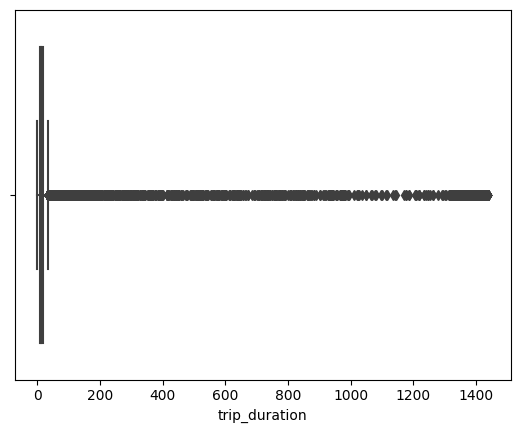

In [94]:
sns.boxplot(x=df['trip_duration'])
plt.show()

In [95]:
q1 = df.quantile(.25)
q1

trip_duration         7.55
distance_traveled     1.98
num_of_passengers     1.00
fare                  0.00
tip                   0.00
miscellaneous_fees    6.00
total_fare            0.00
surge_applied         0.00
Name: 0.25, dtype: float64

In [96]:
q3 = df.quantile(.75)
q3

trip_duration          18.450
distance_traveled       5.790
num_of_passengers       1.000
fare                   97.500
tip                    20.000
miscellaneous_fees     26.525
total_fare            127.875
surge_applied           1.000
Name: 0.75, dtype: float64

In [97]:
iqr = (q3 - q1)
iqr

trip_duration          10.900
distance_traveled       3.810
num_of_passengers       0.000
fare                   97.500
tip                    20.000
miscellaneous_fees     20.525
total_fare            127.875
surge_applied           1.000
dtype: float64

In [98]:
upper_whisker = q3 + 1.5*iqr
upper_whisker

trip_duration          34.8000
distance_traveled      11.5050
num_of_passengers       1.0000
fare                  243.7500
tip                    50.0000
miscellaneous_fees     57.3125
total_fare            319.6875
surge_applied           2.5000
dtype: float64

In [99]:
## Counting the number of values greater than upper whisker

In [100]:
df['trip_duration'][df['trip_duration']>upper_whisker[0]].count()

16617

In [101]:
df['trip_duration'][df['trip_duration']>upper_whisker[0]]

10        1405.083333
17          67.650000
37         188.716667
38          62.033333
45          57.300000
             ...     
299458      41.100000
299468      39.750000
299472      36.666667
299497      42.616667
299524      49.100000
Name: trip_duration, Length: 16617, dtype: float64

In [102]:
df[df['trip_duration']>upper_whisker[0]]

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
10,1405.083333,4.94,2.0,116.25,29,26.200,171.450,1
17,67.650000,30.00,1.0,390.00,0,55.125,445.125,0
37,188.716667,0.14,1.0,337.50,68,2.200,407.700,0
38,62.033333,19.17,1.0,322.50,89,34.300,445.800,1
45,57.300000,27.54,1.0,408.75,4,75.650,488.400,1
...,...,...,...,...,...,...,...,...
299458,41.100000,6.90,1.0,0.00,0,26.625,0.000,1
299468,39.750000,9.30,1.0,0.00,0,6.000,0.000,0
299472,36.666667,16.82,1.0,0.00,59,30.700,0.000,1
299497,42.616667,8.47,1.0,0.00,0,6.000,0.000,0


In [103]:
df.drop(df[df['trip_duration']>upper_whisker[0]].index,inplace=True)

In [104]:
df.shape

(277361, 8)

<Axes: xlabel='trip_duration'>

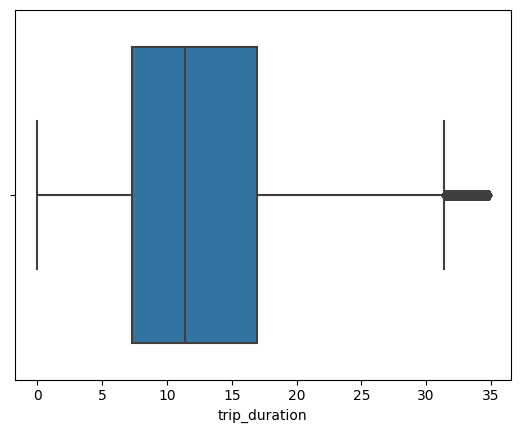

In [105]:
sns.boxplot(x=df["trip_duration"])

In [106]:
df['distance_traveled'][df['distance_traveled']>upper_whisker[1]].count()

13695

<Axes: xlabel='distance_traveled'>

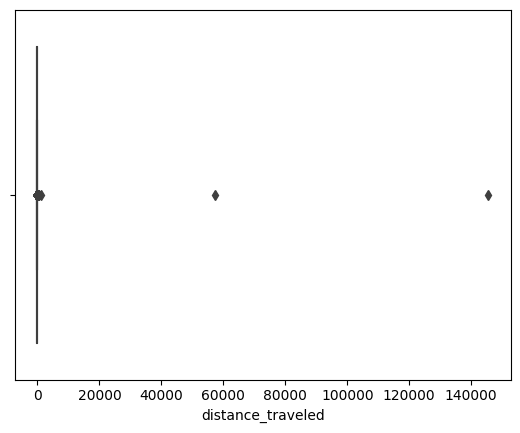

In [107]:
sns.boxplot(x=df["distance_traveled"])

In [108]:
df['distance_traveled'][df['distance_traveled']>upper_whisker[1]].count()

13695

In [109]:
df.drop(df[df['distance_traveled']>upper_whisker[1]].index,inplace=True)

<Axes: xlabel='distance_traveled'>

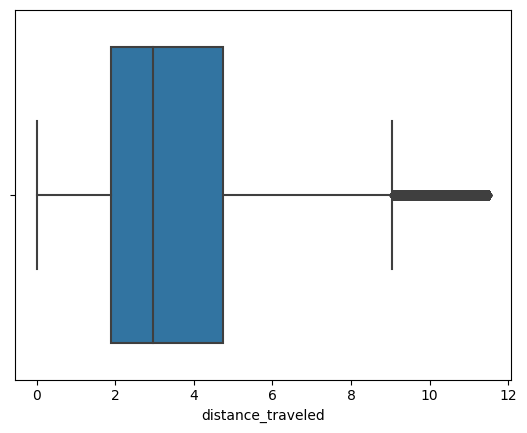

In [110]:
sns.boxplot(x=df["distance_traveled"])

In [111]:
upper_whisker

trip_duration          34.8000
distance_traveled      11.5050
num_of_passengers       1.0000
fare                  243.7500
tip                    50.0000
miscellaneous_fees     57.3125
total_fare            319.6875
surge_applied           2.5000
dtype: float64

In [112]:
df['fare'][df['fare']>upper_whisker[3]].count()

899

In [113]:
df.drop(df[df['fare']>upper_whisker[3]].index,inplace=True)

In [114]:
df['fare'][df['fare']>upper_whisker[3]].count()

0

In [115]:
df['tip'].describe()

count    262767.000000
mean         11.539352
std          15.923826
min           0.000000
25%           0.000000
50%           9.000000
75%          19.000000
max        2500.000000
Name: tip, dtype: float64

<Axes: xlabel='tip'>

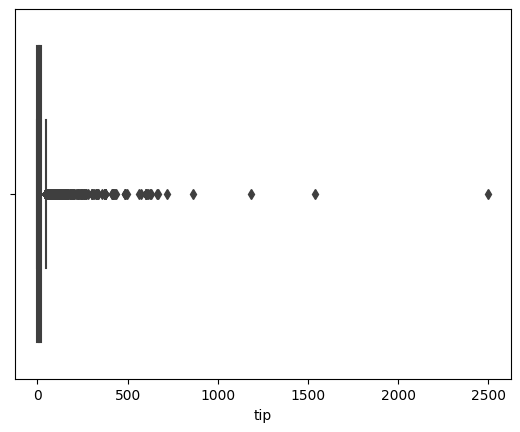

In [116]:
sns.boxplot(x=df['tip'])

In [117]:
df['tip'][df['tip']>upper_whisker[4]].count()

2315

In [118]:
df.drop(df[df['tip']>upper_whisker[4]].index,inplace=True)

In [119]:
df['tip'][df['tip']>upper_whisker[4]].count()

0

<Axes: xlabel='tip'>

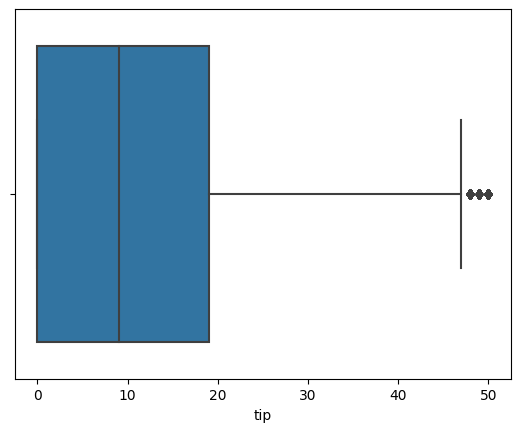

In [120]:
sns.boxplot(x=df['tip'])

<Axes: xlabel='miscellaneous_fees'>

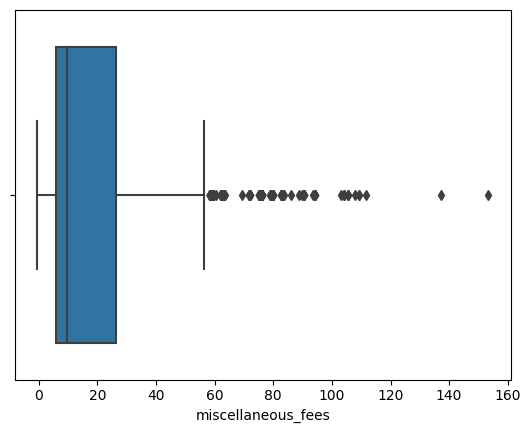

In [121]:
sns.boxplot(x=df['miscellaneous_fees'])

In [122]:
df['miscellaneous_fees'][df['miscellaneous_fees']>upper_whisker[5]].count()

647

In [123]:
df.drop(df[df['miscellaneous_fees']>upper_whisker[5]].index,inplace=True)

<Axes: xlabel='miscellaneous_fees'>

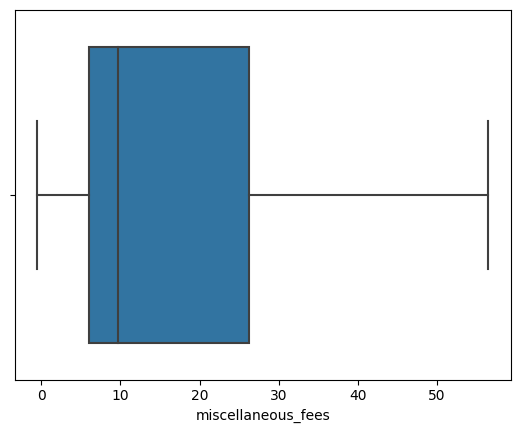

In [124]:
sns.boxplot(x=df['miscellaneous_fees'])

<Axes: xlabel='total_fare'>

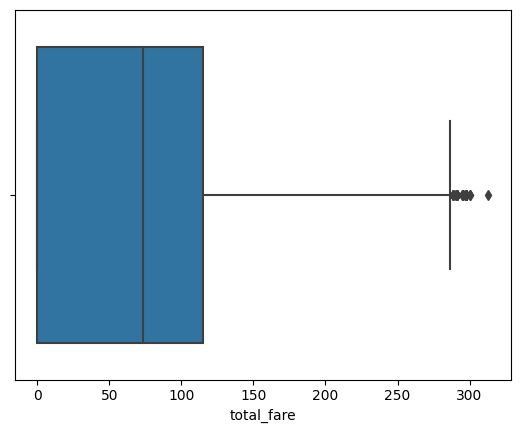

In [125]:
sns.boxplot(x=df['total_fare'])

In [126]:
df['total_fare'][df['total_fare']>upper_whisker[6]].count()

0

In [127]:
upper_whisker

trip_duration          34.8000
distance_traveled      11.5050
num_of_passengers       1.0000
fare                  243.7500
tip                    50.0000
miscellaneous_fees     57.3125
total_fare            319.6875
surge_applied           2.5000
dtype: float64

In [128]:
df.shape

(259805, 8)

In [129]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,259805.000000,259805.000000,259805.000000,259805.000000,259805.000000,259805.000000,259805.000000,259805.000000
mean,12.093336,3.574500,1.292912,55.587463,10.897273,14.021841,72.949753,0.271292
std,6.727677,2.359674,0.939456,47.746092,11.783712,10.103249,61.835219,0.444627
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,7.100000,1.870000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,10.900000,2.930000,1.000000,54.750000,9.000000,9.750000,73.125000,0.000000
75%,15.850000,4.680000,1.000000,86.250000,19.000000,26.250000,114.750000,1.000000
max,34.800000,11.490000,9.000000,243.750000,50.000000,56.500000,313.050000,1.000000


In [130]:
df.corr()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
trip_duration,1.000000,0.752292,0.000894,0.469531,0.289605,0.295894,0.435204,0.309996
distance_traveled,0.752292,1.000000,0.002371,0.480194,0.326248,0.331042,0.451729,0.313882
num_of_passengers,0.000894,0.002371,1.000000,0.002879,-0.010762,0.001302,0.001601,0.001794
fare,0.469531,0.480194,0.002879,1.000000,0.174913,0.154466,0.973001,0.162580
tip,0.289605,0.326248,-0.010762,0.174913,1.000000,0.357779,0.308182,0.353197
miscellaneous_fees,0.295894,0.331042,0.001302,0.154466,0.357779,1.000000,0.280259,0.893423
total_fare,0.435204,0.451729,0.001601,0.973001,0.308182,0.280259,1.000000,0.274238
surge_applied,0.309996,0.313882,0.001794,0.162580,0.353197,0.893423,0.274238,1.000000


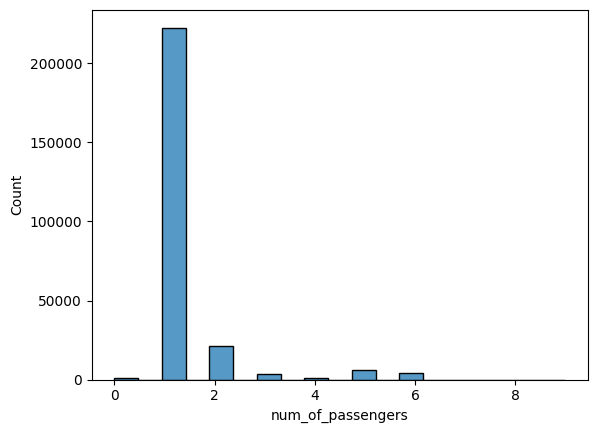

In [131]:
sns.histplot(df['num_of_passengers'])
plt.show()

<Axes: >

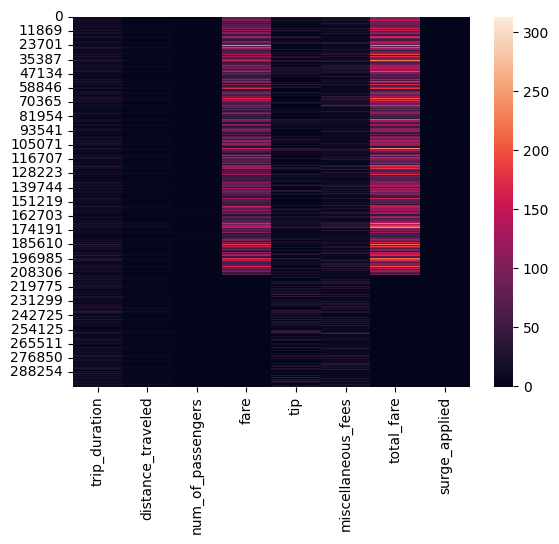

In [132]:
sns.heatmap(df)

In [133]:
# sns.pairplot(df)

In [134]:
x=df.drop(['total_fare','num_of_passengers'],axis=1)
y=df['total_fare']

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25)

In [136]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [137]:
y_pred = model.predict(x_test)

In [138]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
print(mse)
r2 = r2_score(y_test,y_pred)
print(r2)

0.3259241151157776
0.9999143313884955


In [139]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
print(mse)
r2 = r2_score(y_test,y_pred)
print(r2)

0.2538701014393242
0.9999332706661331


In [140]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
print(mse)
r2 = r2_score(y_test,y_pred)
print(r2)

0.18752791300883676
0.9999507086000061


In [141]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
print(mse)
r2 = r2_score(y_test,y_pred)
print(r2)

0.20898802250123166
0.9999450678459236


In [142]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
print(mse)
r2 = r2_score(y_test,y_pred)
print(r2)

68.38146795981835
0.9820260448949032


In [143]:
x_train.head()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,surge_applied
170873,6.650000,3.69,63.75,11,6.250,0
51037,15.350000,4.28,93.75,20,5.950,0
105037,9.333333,2.16,56.25,12,6.450,0
260434,16.350000,4.33,0.00,35,26.575,1
129286,15.883333,4.15,93.75,27,13.350,0


In [65]:
model

LinearRegression()

In [144]:
y_pred1 = model.predict([[30,13,52,0,4,0]])
y_pred1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([29.03096472])

In [145]:
col_names = list(df.columns)
col_names

['trip_duration',
 'distance_traveled',
 'num_of_passengers',
 'fare',
 'tip',
 'miscellaneous_fees',
 'total_fare',
 'surge_applied']

In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new = scaler.fit_transform(df)
df_new = pd.DataFrame(df_new,columns=col_names)
df_new

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,0.358238,0.238012,0.111111,0.307692,0.48,0.119298,0.336368,0.0
1,0.568487,0.297297,0.111111,0.430769,0.48,0.240351,0.454241,0.0
2,0.349617,0.270270,0.111111,0.292308,0.00,0.475877,0.312650,1.0
3,0.321360,0.489102,0.333333,0.369231,0.00,0.179825,0.318639,0.0
4,0.157567,0.180471,0.111111,0.184615,0.24,0.240351,0.224245,0.0
...,...,...,...,...,...,...,...,...
259800,0.208333,0.193548,0.111111,0.000000,0.26,0.249123,0.000000,0.0
259801,0.248563,0.225806,0.111111,0.000000,0.14,0.251754,0.000000,0.0
259802,0.215517,0.193548,0.111111,0.000000,0.00,0.475877,0.000000,1.0
259803,0.440134,0.357454,0.111111,0.000000,0.50,0.538596,0.000000,1.0


In [69]:
df_new.corr()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
trip_duration,1.000000,0.752292,0.000894,0.469531,0.289605,0.295894,0.435204,0.309996
distance_traveled,0.752292,1.000000,0.002371,0.480194,0.326248,0.331042,0.451729,0.313882
num_of_passengers,0.000894,0.002371,1.000000,0.002879,-0.010762,0.001302,0.001601,0.001794
fare,0.469531,0.480194,0.002879,1.000000,0.174913,0.154466,0.973001,0.162580
tip,0.289605,0.326248,-0.010762,0.174913,1.000000,0.357779,0.308182,0.353197
miscellaneous_fees,0.295894,0.331042,0.001302,0.154466,0.357779,1.000000,0.280259,0.893423
total_fare,0.435204,0.451729,0.001601,0.973001,0.308182,0.280259,1.000000,0.274238
surge_applied,0.309996,0.313882,0.001794,0.162580,0.353197,0.893423,0.274238,1.000000


In [147]:
x1=df_new.drop(['total_fare','num_of_passengers'],axis=1)
y1=df_new['total_fare']

In [148]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.3)

In [149]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x1_train,y1_train)

LinearRegression()

In [150]:
y_pred = model.predict(x1_test)

In [151]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y1_test,y_pred)
print(mse)
r2 = r2_score(y1_test,y_pred)
print(r2)

0.000703770699441613
0.9819772493678306


In [152]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x1_train,y1_train)
y_pred = model.predict(x1_test)
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y1_test,y_pred)
print(mse)
r2 = r2_score(y1_test,y_pred)
print(r2)

2.3859087771480883e-06
0.9999388996459276


In [153]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x1_train,y1_train)
y_pred = model.predict(x1_test)
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y1_test,y_pred)
print(mse)
r2 = r2_score(y1_test,y_pred)
print(r2)

2.667240210221236e-06
0.9999316950745135


In [154]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x1_train,y1_train)
y_pred = model.predict(x1_test)
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y1_test,y_pred)
print(mse)
r2 = r2_score(y1_test,y_pred)
print(r2)

2.330884612874482e-06
0.9999403087508992
